-----------------
# Programming for Data Analytics -  Project
### Eoin Lees - G00387888 - December 2020
------------

### Problem statement

For this project you must create a data set by `simulating a real-world phenomenon of
your choosing.` You may pick any phenomenon you wish – you might pick one that is
of interest to you in your personal or professional life. Then, rather than collect data
related to the phenomenon, you should `model and synthesise such data using Python.`
We suggest you use the numpy.random package for this purpose.
    Specifically, in this project you should:
    
* Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
* Investigate the types of variables involved, their likely distributions, and their relationships with each other.
* Synthesise/simulate a data set as closely matching their properties as possible.
* Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.


Note that `this project is about simulation` – you must synthesise a data set. Some
students may already have some real-world data sets in their own files. It is okay to
base your synthesised data set on these should you wish (please reference it if you do),
but the main task in this project is to create a synthesised data set. The next section
gives an example project idea

-------------------

In [1]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

------------------------

# Table of contents 

1. [Introduction](#introduction)

    * [Boston Marathon](#BostonMarathon)
    
    * [Aims](#Aims)
    
    
2. [Import Race Data](#import)  

    * [First impressions](#impressions)
    
    
3. [Create random sample](#3.)

    * [Sample creation](#samplecreation)
    * [Clean up data at source](#cleaningup)
    * [Set data types](#setdatatypes)
    
    
4. [Data sample analysis](#4.)

    * [Summary](#datasamplesummary)
    * [Place Overall](#placeoverallsample)
    * [Gender](#gendersample)
    * [Time](#timesample)
    * [Age](#agesample)
   
   
5. [Simulate Data](#5.)

    * [Time](#time)
    * [Gender](#gender)
    * [Age](#age)
    * [Place](#variableplacee)
    
    
6. [Create Dataframe - combine data](#6.)

    * [Method of combining datasets](#methodsofcombiningdata)
    

7. [Results: Simulated data set](#7.)

    * [Data frame](#dataframe)
    * [Summary](#dfsummary)
    * [Plots](#dfplots)
    
    
8. [Conclusions](#8.)

    * [Discussion](#discussion)
    * [Possible uses for data](#uses)
    * [Sources of error](#error)
    * [Reccommended further study](#reccomendedstudy)
    
    
9. [References](#references)


table of contents source:  [[5]](https://stackoverflow.com/questions/11948245/markdown-to-create-pages-and-table-of-contents/33433098#33433098)

--------------------------

-------------------------------
# 1. Introduction <a name="introduction"></a>
--------------------------------

The marathon is a long-distance running race with an official distance of 42.195 kilometres (26 miles 385 yards). [[3]](https://en.wikipedia.org/wiki/Marathon)
The marathon was one of the original modern Olympic events in 1896, though the distance did not become standardized until 1921. More than 800 marathons are held throughout the world each year, with the vast majority of competitors being recreational athletes, as larger marathons can have tens of thousands of participants.


##  Aims <a name="Aims"></a>

The aim of this project is to take data from a known marathon and use it to aid in simulating a "Galway 2020" marathon dataset.

The data set with the real measured values will be review to decide on whice variables are best to choose and then simulate based on their properties. 

The simulated dataset will also be influenced by further research in the marathon field to ensure un biased results. 


## Boston Marathon  <a name="BostonMarathon"></a>

The Boston Marathon is the world's oldest annual marathon. It began on april 19th 1897. It typically takes place on the third monday in April. [[1]](https://en.wikipedia.org/wiki/Boston_Marathon) 

### Data set 

The data set was taken from the "Boston-Marathon-Data-Project" repo found on git hub. It contains a csv file of the results of every Boston Marathon.  [[2]](https://github.com/adrian3/Boston-Marathon-Data-Project)

It contains the following variables: 

`"place_overall","bib","name","age","gender","city","state","country_residence","contry_citizenship","name_suffix","5k",
"10k","15k","20k","half","25k","30k","35k","40k","pace","projected_time","official_time","overall","gender_result",
"division_result",seconds,"first_name","last_name","display_name"`

The data is in 26646 rows × 50 columns.

It shows  the information for the 26645 finishers of the Boston marathon on April 15th 2019. 

**Bias**

As the Boston marathon is one of the most highly regarded marathons in the world they receive many entry applications a year. It is currently capped at 30,000 entrants. 

Because of this the Boston Athletic Association (B.A.A.) has come up with a system of qualification for the race based on certain qualifying standards. [[4]](https://www.baa.org/races/boston-marathon/qualify) With qualifying times for ages 18-34 at 3hrs for men and 3hrs 30min for women this will lead to a significant source of bias for simulating an event in Galway. Other criteria for times will be considered. 


---------------------------


# 2. Import Race Data <a name="import"></a>

---------------------

In [2]:
df = pd.read_csv("./results2019.csv", low_memory=False) 
df

,place_overall,bib,name,age,gender,city,state,country_residence,contry_citizenship,name_suffix,...,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
0,1,2,"Cherono, Lawrence",30,M,Eldoret,NaN,Kenya,Kenya,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,6,"Desisa, Lelisa",29,M,Ambo,NaN,Ethiopi,Ethiopi,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,7,"Kipkemoi, Kenneth",34,M,Eldoret,NaN,Kenya,Kenya,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,8,"Kandie, Felix",32,M,Iten,NaN,Kenya,Kenya,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,11,"Kirui, Geoffrey",26,M,Keringet,NaN,Kenya,Kenya,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26641,26653,23909,"Mcninch, Brett",42,M,New Lebanon,OH,United,United,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26642,26654,23949,"Oconell, Justin",28,M,Franklin,MA,United,United,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26643,26655,15946,"Young, John",53,M,Salem,MA,United,United,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26644,26656,23937,"Smith, Denise",51,F,Fort Collins,CO,United,United,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.describe()

,name_suffix,5k,10k,15k,20k,half,25k,30k,35k,40k,...,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Initial variable selection

After having a quick look at the data set and keeping in mind the task the variables chosen to investigate are:

* gender - the gender of the participant
* age - the age of the person
* official_time - the official finishing time 
* place_overall - their place overall

Using `pandas` we can easily import the csv and then select these variables from the larger dataframe.[[6]](https://pandas.pydata.org/pandas-docs/stable/reference/io.html) We can then create a new one thats easier to deal with. 

In [4]:
marathonData = df[["gender", "age", "official_time",  "place_overall" ]]
marathonData.head()

,gender,age,official_time,place_overall
0,M,30,02:07:57,1
1,M,29,02:07:59,2
2,M,34,02:08:07,3
3,M,32,02:08:54,4
4,M,26,02:08:55,5


In [5]:
marathonData.tail()

,gender,age,official_time,place_overall
26641,M,42,07:14:12,26653
26642,M,28,07:16:19,26654
26643,M,53,07:17:35,26655
26644,F,51,07:25:39,26656
26645,M,66,07:43:48,26657


In [6]:
marathonData.describe()

,gender,age,official_time,place_overall
count,26646,26646,26646,26646
unique,4,68,9562,26646
top,M,45,03:49:19,2060
freq,14664,1052,13,1


## First impressions <a name="impressions"></a>

There is a lot of usefull information in this data set. Combined with all of the data from the past boston marathons [[2]](https://github.com/adrian3/Boston-Marathon-Data-Project) it would be possible to do a proper in depth analysis of the Boston marathon over its history.

However, that is not the purpose of this exercise. All that is needed is a data set to help make some decisions when simulating a new data set. As it is, this data set is too large to work with as it has over 26000 entrants with 50 individual data points for each. Running functions on a data set of this size takes up a lot of processing power and time. It is not needed. In order to solve this issue a create random sample is created. 

--------------------------

# 3. Create random sample <a name="3."></a>

--------------------------

In [7]:
# Create sample
marathonSample = marathonData.sample(n=1000)


In [8]:
# View created sample
marathonSample

,gender,age,official_time,place_overall
12523,F,45,03:42:37,12530
5729,M,46,03:16:41,5732
6370,F,29,03:19:14,6375
15892,M,50,03:55:47,15899
18870,M,64,04:12:05,18879
...,...,...,...,...
19642,M,67,04:16:45,19651
19282,F,48,04:14:34,19291
15923,F,52,03:55:56,15930
23131,M,22,04:46:24,23141


In [9]:
marathonSample.head()

,gender,age,official_time,place_overall
12523,F,45,03:42:37,12530
5729,M,46,03:16:41,5732
6370,F,29,03:19:14,6375
15892,M,50,03:55:47,15899
18870,M,64,04:12:05,18879


In [10]:
marathonSample.tail()

,gender,age,official_time,place_overall
19642,M,67,04:16:45,19651
19282,F,48,04:14:34,19291
15923,F,52,03:55:56,15930
23131,M,22,04:46:24,23141
19499,F,29,04:15:55,19508


##  Sample creation <a name="samplecreation"></a>

The random sample of 1000 entrants from the large dataset was created using `pandas.DataFrame.sample`.[[7]](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) It returns a random sample of items from an axis of object.


##  Clean up data at source <a name="cleaningup"></a>

After an initial look at the sample it seemed as if there had been an error in data entry. A name had been entered as a gender. 

The incorrect data was removed from the csv file and the data set was rerun.


##  Set data types <a name="setdatatypes"></a>

dtypes

Checked using `marathonSample.dtypes` which return the dtypes in the DataFrame. [[9]](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html)


* **gender**

    "gender" will be left as an object as it is either "M" or "F"


* **age & place_overall**

    Both set as integers. 
    <br>

* **Official time**

    Timedeltas are absolute differences in times, expressed in difference units (e.g. days, hours, minutes, seconds). This method converts an argument from a recognized timedelta format / value into a Timedelta type.

    Convert "official_time" to `timedelta64[ns]` using  `pandas.to_timedelta.` [[8]](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_timedelta.html)

    This allows the time to be treated as a duration in minutes, making it easier to graph. 


In [11]:
# Check data types
marathonSample.dtypes

gender           object
age              object
official_time    object
place_overall    object
dtype: object

In [12]:
# using dictionary to convert specific columns 
convert_dict = {'gender': str,'age': int, "place_overall" : int,
               }   
marathonSample = marathonSample.astype(convert_dict) 

In [13]:
# Convert official time to timedelta64
marathonSample["official_time"] = pd.to_timedelta(marathonSample["official_time"], unit='m')
marathonSample.dtypes

gender                    object
age                        int32
official_time    timedelta64[ns]
place_overall              int32
dtype: object

In [14]:
# Convert hours:minutes:seconds to total minutes
s = marathonSample["official_time"]

mins = s.dt.total_seconds()/60
marathonSample["official_time"] = mins

### Total minutes 

To convert the "official_time" to minutes the array must be passed into `Series.dt`. 
[[12]](https://pandas.pydata.org/docs/reference/series.html#datetimelike-properties) It can be used to access the values of the series as datetimelike and return several properties. 

It then can call the `total_seconds`[[11]](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timedelta.total_seconds.html) command to convert the values to seconds. It was then divided my 60 to give minutes. 

The method was found on stackoverflow. [[10]](https://stackoverflow.com/questions/26456825/convert-timedelta64ns-column-to-seconds-in-python-pandas-dataframe)






In [15]:
marathonSample

,gender,age,official_time,place_overall
12523,F,45,222.616667,12530
5729,M,46,196.683333,5732
6370,F,29,199.233333,6375
15892,M,50,235.783333,15899
18870,M,64,252.083333,18879
...,...,...,...,...
19642,M,67,256.750000,19651
19282,F,48,254.566667,19291
15923,F,52,235.933333,15930
23131,M,22,286.400000,23141






----------------------------------

# 4. Data sample analysis <a name="4."></a>



## Summary <a name="datasamplesummary"></a>

The purpose of this section is to discover information that may be usefull in creating a simulated data set. 

The summary of the data below is provided by `marathonSample.describe()`.[[13]](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)  

It provides important tools for simulation later in the notebook such as standard deviation, mean min and max values. 

In [16]:
# Summary of data
marathonSample.describe()

,age,official_time,place_overall
count,1000.000000,1000.000000,1000.000000
mean,42.720000,232.693633,13243.597000
std,11.553661,45.246108,7825.908277
min,18.000000,137.100000,22.000000
25%,33.000000,199.695833,6486.250000
50%,43.000000,225.450000,13294.500000
75%,51.000000,260.587500,20230.000000
max,76.000000,382.450000,26641.000000


## Place Overall <a name="placeoverallsample"></a>

Place overall is directly determined by the time variable. The lower the time the lower the place.  

In general Males finished with lower places than female. 

It has its use in ranking all of the finishers in order. 

-----------------

## Gender <a name="gendersample"></a>

Traditionally there are more male than female runners in races.[[14]](https://runrepeat.com/research-marathon-performance-across-nations) This is however changing. [[15]](https://runningmagazine.ca/the-scene/new-study-reports-more-female-than-male-runners-for-the-first-time-ever/)

Famously in 1967, 20-year-old Kathrine Switzer made history when she defiantly became the first woman to officially run in the Boston Marathon, even as race officials tried to physically stop her. [[16]](https://www.nbcnews.com/feature/inspiring-america/first-woman-officially-run-boston-marathon-makes-triumphant-return-n747616#:~:text=In%201967%2C%2020%2Dyear%2D,tried%20to%20physically%20stop%20her.) This fact alone is enough to question the gender bias in sport. 

Looking from the sample created from the 2018 race data we see that it is still more male than female runnners:

**Sample**
* Male: 570 = 57%
* Female: 430 =43%

When compared to the total number of runners we see that this sample is representive: 

**Population results**
* Male: 14664 = 55%
* Female: 11980 = 45%
* Error: 2 = negligable

This data can be used to form a sample for simulation. 

In [17]:
marathonData.gender.value_counts()

M                 14664
F                 11980
Fredericksburg        1
62                    1
Name: gender, dtype: int64

In [18]:
# count male and female values
marathonSample.gender.value_counts()

M    570
F    430
Name: gender, dtype: int64

(array([430.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 570.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

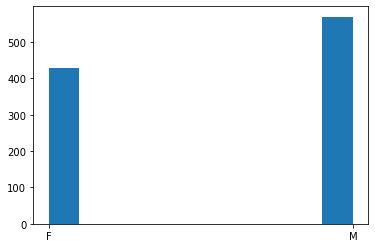

In [19]:
plt.hist(marathonSample["gender"])


------------------

## Time <a name="timesample"></a>
 
The world record for marathon times are 2:01:39 for men and 2:15:25 for women. Elite men tend to average about 2:05:00 and elite women tend to score around 2:22:00. [[16]](https://www.asics.com/ie/en-ie/running-advice/what-is-a-good-time-for-a-marathon/)
The global average time for a marathon stands at around 4 hours 21 minutes – with men’s average times at 4 hours 13 minutes, and women at 4 hours 42 minutes.

Looking at the sample from our data graphed below and the summary above we see an average time of 200 - 250 minutes which is a little faster than the global average at about 3hr 20 - 4 hrs 10. The mean from our summary is 3:51:53.

From the graph we see a peak and a trail off to eather side almost mirroring a normal distribution. 
The plot is split into male and female times. As referenced to above overall the male times are faster. Both genders have a sharp rise towards the mean and a longer slope off. 

However due to the qualification standards for the boston marathon this is expected. As in order to qualify to run the race you need to meet a qualifying time that is quite challenging for most runners. [[4]](https://www.baa.org/races/boston-marathon/qualify) It seems to be the case that many runners run the boston marathon slightly slower than there qualifying time. This may be down to a number of factors including running for enjoyment, weather, a difficult course etc. [[17]](https://www.wired.com/story/how-the-boston-marathon-messes-with-runners-to-slow-them-down/)


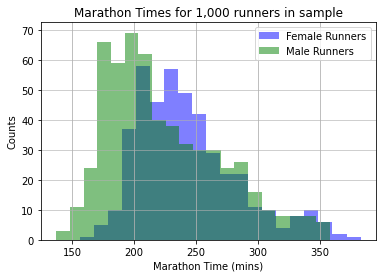

In [20]:
femaleSample = marathonSample.loc[marathonSample["gender"] == "F", "official_time"]
maleSample = marathonSample.loc[marathonSample["gender"] == "M", "official_time"]

femaleSample.plot.hist(grid=True, bins=20, rwidth=10, color='blue', label="Female Runners", alpha=0.5)

maleSample.plot.hist(grid=True, bins=20, rwidth=10, color='green', label="Male Runners", alpha=0.5)

plt.title('Marathon Times for 1,000 runners in sample')
plt.ylabel('Counts')
plt.xlabel('Marathon Time (mins)')
plt.legend(loc="best")
plt.grid(axis='y', alpha=0.75)


------------------

## Age <a name="agesample"></a>

The average age of the sample selected is 42 years old. While the average age of a runner in the Boston Marathon is 42.5, that doesn’t tell the whole story. 

The Marathon is split into age groups for qualifying purposes. Ther are as follows:
<br>
<br>
<img src="https://miro.medium.com/max/700/1*Eq3DIrFSzeWnG2gzEGGwww.png" width="350" height="250">[[18]](https://ade3.medium.com/boston-marathon-data-analysis-part-1-4891d1832eba)

<br>

An interesting side effect separating the field into age groups is that it gives an advantage to runners on the younger side of the 5 year divisions. You have a much better chance of running a 3:35 as a 55 year old than running a 3:25 at 54 years old.[[18]](https://ade3.medium.com/boston-marathon-data-analysis-part-1-4891d1832eba)

The largest demographic in the Boston Marathon by far is the female 18–34 group with 4,033 runners. The second largest group is the 18–34 male group with 2,984 runners. The 18–34 age groups are a 16 year spread while the other age groups are 5 years, so it makes sense that they will be large. Coming in third is the male 45-49 group with 2,540. The next closest group are males 40–44 with 1,932.

Looking at our sample we see that our plot reflects this data from the overall data of the boston marathon 2018. It shows a large grouping up front, with a spike at the 45-49 age group before tailing off. 



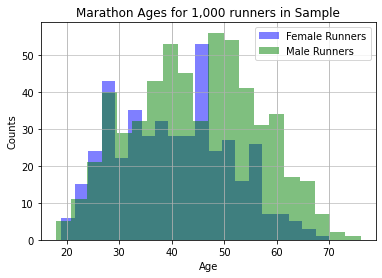

In [21]:
femaleSample = marathonSample.loc[marathonSample["gender"] == "F", "age"]
maleSample = marathonSample.loc[marathonSample["gender"] == "M", "age"]

femaleSample.plot.hist(grid=True, bins=20, rwidth=10, color='blue', label="Female Runners", alpha=0.5)

maleSample.plot.hist(grid=True, bins=20, rwidth=10, color='green', label="Male Runners", alpha=0.5)

plt.title('Marathon Ages for 1,000 runners in Sample')
plt.ylabel('Counts')
plt.xlabel('Age')
plt.legend(loc="best")
plt.grid(axis='y', alpha=0.75)


------------------

# 5. Simulate Data <a name="5."></a>
------------------------

The purpose of this notebook is to "create a data set by simulating a real-world phenomenon". Section 4 is a quick look into the real world phenomenon of the Boston Marathon. This section will use this analysis along with further research in the feild to be a decent simulated model of a similar event. 

#### Galway Marathon 2020

The event that is being simulated is the "Galway Marathon 2020". Considering the pandemic and the lack of any real races this year, it is a good exercise to undertake to replace the real event. 

There are a number of initial differences from the data set studied and they are stated here: 

* Number of entrants = 1000
* Galway based race
* No qualification standards
* No bias towards elite standard runners 

-------------



##  Time <a name="time"></a>

------------------


### Investigation

There are numorous studies into marathon running and the times associated with them. Studies such as this one by runrepeat.com [[23]](https://runrepeat.com/research-marathon-performance-across-nations) go indepth into many aspects of marathon racing. It contains 19,614,975 marathon results from 2008 to 2018 from more than 32,335 races across the globe.It gives us stats that are usefull when trying to simulate a result, such as the average time to run a marathon in Ireland is 4:16.

There are also articles that study irish specific races such as the most popular one in Ireland The dublin marathon. [[24]](https://medium.com/running-with-data/a-data-analysis-of-the-dublin-marathon-48138724973e) It backs up the results for ireland stated above. 

**World records**

The following are the current world records for marathon running:[[26]](https://www.runnersworld.com/races-places/a20823734/these-are-the-worlds-fastest-marathoners-and-marathon-courses/)

* Male - Eliud Kipchoge (Kenya) 2:01:39Time  - 4:38.4 Pace per mile -   Berlin, 2018 - 121.39mins


* Female - Brigid Kosgei (Kenya) - 2:14:04 Time - 5:06.8 Pace per mile - Chicago, 2019 = 134.04 mins


### Type


Integers are created using the method stated below. The time variable is stated in minutes and plotted against the count.  

### Distribution

In a standard marathon the official time results tend to be normally distributed. Sprcifically with this type of local race with smaller numbers this is true. With no qualification standards and a number of runners chosen at random it can be asumed that the distribution of times will be normally distributed. 

<br>
<img src="https://www.researchgate.net/profile/George_Wu3/publication/301571201/figure/fig2/AS:601871815299079@1520508831816/Distribution-of-Marathon-Finishing-Times-n-9-789-093.png" width="350" height="250">
<br>

[[19]](https://www.researchgate.net/profile/George_Wu3/publication/301571201/figure/fig2/AS:601871815299079@1520508831816/Distribution-of-Marathon-Finishing-Times-n-9-789-093.png)

<br>
<br>

### Method

The method of creating the normal distribution of times with specific boundaries was done using `scipy.stats.truncnorm`[[20]](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.truncnorm.html) In probability and statistics, the truncated normal distribution is the probability distribution derived from that of a normally distributed random variable by bounding the random variable. [[22]](https://en.wikipedia.org/wiki/Truncated_normal_distribution)

The method for performing this was found on stack overflow. [[21]](https://stackoverflow.com/questions/36894191/how-to-get-a-normal-distribution-within-a-range-in-numpy)

The times were calculated seperately based on gender. First split 50/50 then after doing further investigation into the gender variable were changed to reflect this. 

* Mean: Male = 4:23:27 = 263mins / Female = 5:00:39. = 300mins [[25]](https://www.runnersworld.com/uk/training/marathon/a27787958/average-marathon-finish-time/)

* Std: Male and female std taken from Boston marathon results.  

* upper: 400 minutes set as max time for running. Max from Boston marathon is 382. Allowed extra time. 

* lower: Decided as 122 for male and 134 for female. Based on Boston times along with Irish specific records listed here [[24]](https://medium.com/running-with-data/a-data-analysis-of-the-dublin-marathon-48138724973e)


### Relationship

Directly influences position in race. It also has an effect on gender. Chosing a particurarly fast time will have a higher possibility of being a Male runner. The same can be said for age, with younger runners generally achieving faster times. 

----------------

In [40]:
from scipy.stats import truncnorm

def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)


In [41]:
# Set male times: 590 male
maleMarathonTime = get_truncated_normal(mean=256, sd=45, low=122, upp=400)
maleTimes = maleMarathonTime.rvs(590)

# Set female times. 410 female
femaleMarathonTime = get_truncated_normal(mean=300, sd=60, low=134, upp=400)
femaleTimes = femaleMarathonTime.rvs(410)

---------------------

##  Gender <a name="gender"></a>
 
-------------



### Investigation

The sex ratio – the share of the population that is female – varies across the world. And globally in 2017 the share of women in the world was 49.6%.

There are three reasons why the sex ratio of populations varies and is rarely equal:

* differences in mortality rates and life expectancy for women and men. Women, on average, live longer than men. This means that all else being equal, we would expect females to account for slightly more than half of the total population.

* sex ratios at birth are not equal. In all countries, there are more male than female births (the extent of which varies by country as we will see below). This means that all else being equal, we would expect males to account for slightly more than half of the total population.

* migration can also affect the sex ratio of the population. If in some countries there is a significant amount of imported male-dominant labour, all else being equal, we would expect males to account for more than half of the total population.

Most countries have a female share of the population between 49 and 51 percent (within one percentage point of parity).
[[27]](https://ourworldindata.org/gender-ratio)

**Marathon running**

However looking specificalli at marathon running you could assume this ratio to follow through. This is not the case. 

Historically more males ran than females. This is especially true in the boston marathon studied above as it wasnt until 2967 when Kathrine Switzer became the first woman to run. [[27]](https://en.wikipedia.org/wiki/Kathrine_Switzer)

The effect of this historic bias in running is still apparent today. The world average proportion of women in marathon running is 31.36%. [[23]](https://runrepeat.com/research-marathon-performance-across-nations) 


### Type

The data type here is an object with either "M" or "F" attached to it. 

Note: this analysis does not take into account non binary folk who also run marathons. It may be a source of bias, however negligible. 


### Distribution

Based on the investigation into male vs female percentages historically and nationally it was decided upon as:

* Male: 590 runners 59%
* Female: 410 runners 41%

This is based on the historical maximum precentage of female participants in the dublin marathon from 2001 at 41% [[29]](http://www.shanegalvin.com/analysing-dublin-marathon-data-1980-2016/)


### Relationship

The relationship gender will have on the overall dataset is in generall male's will have a lower offivial position and a lower time. 



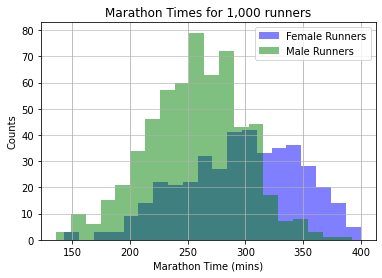

In [42]:
# Plot male and female times vs number of runners
import pandas as pd

femaleMarathon = pd.Series(femaleTimes) # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html
maleMarathon = pd.Series(maleTimes)


femaleMarathon.plot.hist(grid=True, bins=20, rwidth=10, color='blue', label="Female Runners", alpha=0.5)

maleMarathon.plot.hist(grid=True, bins=20, rwidth=10, color='green', label="Male Runners", alpha=0.5)

plt.title('Marathon Times for 1,000 runners')
plt.ylabel('Counts')
plt.xlabel('Marathon Time (mins)')
plt.legend(loc="best")
plt.grid(axis='y', alpha=0.75)

-------------------------

##   Age <a name="age"></a>

-----------------------

### Investigation 

Median age is the age that divides a population into two numerically equally sized groups - that is, half the people are younger than this age and half are older. It is a single index that summarizes the age distribution of a population.

The average age in ireland is 36 for males and 37 for females. [[30]](https://en.wikipedia.org/wiki/List_of_countries_by_median_age)

The average age of a male marathon runner is 40 years old. [[31]](https://marathonhandbook.com/average-marathon-time/#:~:text=The%20average%20age%20of%20a%20male%20marathon%20runner%20is%2040%20years%20old.)

The summary above of the boston marathon data shows the following statistics:

* Mean: 42.7
* std: 11.5
* min: 18
* max: 76


### Type

Integers are created using the method stated below. The age variable is stated in years old and plotted against the count. 

### Distribution

Normal distribution like a regular age distribution in a population.
 
* Mean - 40 male and 41 female [[30]](https://en.wikipedia.org/wiki/List_of_countries_by_median_age),[[31]](https://marathonhandbook.com/average-marathon-time/#:~:text=The%20average%20age%20of%20a%20male%20marathon%20runner%20is%2040%20years%20old.)

* Std - 10: taken from boston marathon data sample summary

* Low - 18 years old is set as the minimum age for entry. 

* High - 79 set as upper limit. based on recorded age of dublin marathon runners. 


#### Set ages for each gender

In [57]:
# Set male ages
maleMarathonAges = get_truncated_normal(mean=40, sd=10, low=18, upp=79)
maleAges = maleMarathonAges.rvs(590)


# Set female ages
femaleMarathonAges = get_truncated_normal(mean=41, sd=10, low=18, upp=79)
femaleAges = femaleMarathonAges.rvs(410)

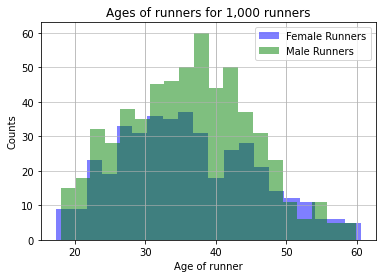

In [56]:
femaleAgesMar = pd.Series(femaleAges) # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html
maleAgesMar = pd.Series(maleAges)

femaleAgesMar.plot.hist(grid=True, bins=20, rwidth=10, color='blue', label="Female Runners", alpha=0.5)

maleAgesMar.plot.hist(grid=True, bins=20, rwidth=10, color='green', label="Male Runners", alpha=0.5)

plt.title('Ages of runners for 1,000 runners')
plt.ylabel('Counts')
plt.xlabel('Age of runner')
plt.legend(loc="best")
plt.grid(axis='y', alpha=0.75)

-------------------
### Place <a name="variableplacee"></a>

--------------


### Type

Integers are created using the method stated below. 

### Relationship

The place variable is entirely dependent on the time variable. The faster the time the lower the position. In order to get a lower position you need to run faster than the position you had. 


-----------------------------
# 6. Create Dataframe - combine data <a name="6."></a>

-----------------------------

The data frame was then created by combining all the individual data sets that were created seperately as shown below.

### Add gender column 

In [45]:
FGender = np.full(shape=410, fill_value="F", dtype=np.dtype(object))

FGender
#femaleMarathon

array(['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F

### Combine all gendered data

In [46]:
# Set as data frame and Add gender to df 
dfFemale = pd.DataFrame(femaleMarathon) 
dfFemale['Gender'] = FGender
dfFemale['Age'] = femaleAges.round(0) #(https://stackoverflow.com/questions/61230535/how-to-round-the-column-mean-to-integer-in-a-dataframe-in-python)
dfFemale = dfFemale.rename(columns={0: "Time"}) 

dfFemale

,Time,Gender,Age
0,367.011224,F,40.0
1,217.413247,F,40.0
2,275.810143,F,40.0
3,332.731566,F,47.0
4,350.604000,F,30.0
...,...,...,...
405,290.171270,F,48.0
406,296.009924,F,35.0
407,258.903182,F,37.0
408,237.775496,F,34.0


In [47]:
dfMale = pd.DataFrame(maleMarathon)

Mgender = np.full(shape=590, fill_value="M", dtype=np.dtype(object))
dfMale['Gender'] = Mgender
dfMale['Age'] = maleAges.round(0)
dfMale = dfMale.rename(columns={0: "Time"}) 


,Time,Gender,Age
0,263.633024,M,26.0
1,272.806644,M,39.0
2,303.394241,M,45.0
3,250.770499,M,39.0
4,298.698256,M,46.0
...,...,...,...
585,291.966409,M,50.0
586,260.432234,M,43.0
587,276.112199,M,34.0
588,235.818292,M,36.0


### Combine two data frames


In [48]:
# Concationate data sets
frames = [dfMale, dfFemale]
df = pd.concat(frames)
df

,Time,Gender,Age
0,263.633024,M,26.0
1,272.806644,M,39.0
2,303.394241,M,45.0
3,250.770499,M,39.0
4,298.698256,M,46.0
...,...,...,...
405,290.171270,F,48.0
406,296.009924,F,35.0
407,258.903182,F,37.0
408,237.775496,F,34.0


### Sort values

In [49]:
df = df.sort_values(by=['Time'])
df

,Time,Gender,Age
207,135.862111,M,27.0
75,142.207817,M,41.0
152,143.004159,F,27.0
236,148.399268,M,40.0
16,150.142485,F,23.0
...,...,...,...
69,392.495583,M,37.0
240,392.702354,F,30.0
13,394.846465,F,31.0
370,395.702389,F,32.0


### Add new finish order

In [50]:
# Show df in current order with index out of order
df

,Time,Gender,Age
207,135.862111,M,27.0
75,142.207817,M,41.0
152,143.004159,F,27.0
236,148.399268,M,40.0
16,150.142485,F,23.0
...,...,...,...
69,392.495583,M,37.0
240,392.702354,F,30.0
13,394.846465,F,31.0
370,395.702389,F,32.0


In [51]:
# Add new index
df = df.apply(lambda col: col.reset_index(drop=True))

In [52]:
# Add new label
df.rename_axis("Place", axis='index', inplace=True)

In [53]:
df

,Time,Gender,Age
Place,,,
0,135.862111,M,27.0
1,142.207817,M,41.0
2,143.004159,F,27.0
3,148.399268,M,40.0
4,150.142485,F,23.0
...,...,...,...
995,392.495583,M,37.0
996,392.702354,F,30.0
997,394.846465,F,31.0


## Method of combining datasets. <a name="methodsofcombiningdata"></a>

The code above goes through a sequence of steps to manipulate the simulated data that was created into a workable dataset. This is the data set that can be used for further analysis in the furure. 

The methods used above are the following:

1. Create gender column: Using `numpy.full` to create a full data set of the appropiate gender, in this case female. 
    * `numpy.full`: Return a new array of given shape and type, filled with fill_value. [[32]](https://numpy.org/doc/stable/reference/generated/numpy.full.html)


2. Combine gender column with existing time data using `pd.DataFrame` [[33]](https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/)
    * `pd.DataFrame`: Two-dimensional, size-mutable, potentially heterogeneous tabular data.[[34]](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)
    
  
3. Repeat steps 1 and 2 for male data. 


4. Merge the two seperate datasets. define two datasets in array and concationate. [[35]](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)
    * use `pd.concat`: Concatenate pandas objects along a particular axis with optional set logic along the other axes [[36]](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)
    
5. Sort the values according to time. Fastest to slowest.
    * `df.sort_values`: Sort by the values along either axis.[[36]](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)
    
6. Reset index and rename as place. Use functions listed below.
    * `df.apply`: Apply a function along an axis of the DataFrame. [[37]](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html)
    * `df.rename_axis`: Set the name of the axis for the index or columns. [[38]](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename_axis.html)
    

# 7. Results: Simulated data set <a name="7."></a>
-----------------

## Data Frame <a name="dataframe"></a>

In [54]:
df

,Time,Gender,Age
Place,,,
0,135.862111,M,27.0
1,142.207817,M,41.0
2,143.004159,F,27.0
3,148.399268,M,40.0
4,150.142485,F,23.0
...,...,...,...
995,392.495583,M,37.0
996,392.702354,F,30.0
997,394.846465,F,31.0


## Summary <a name="dfsummary"></a>

In [58]:
# Describe dataframe
df.describe()

,Time,Age
count,1000.000000,1000.000000
mean,272.785320,35.730000
std,49.827021,9.137099
min,135.862111,18.000000
25%,237.822384,29.000000
50%,272.001591,35.000000
75%,306.148771,42.250000
max,399.791021,68.000000


## Plots <a name="dfplots"></a>

Here we see the plots of the simulated data set. They mirror the plots of the sample taken from the boston marathon set and can be used for undertaking a simulated analysis. 

(array([590.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 410.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

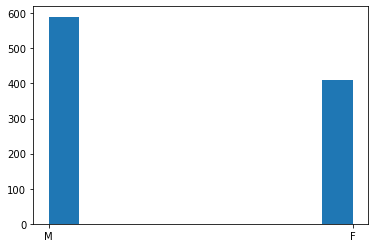

In [70]:
plt.hist(df["Gender"])

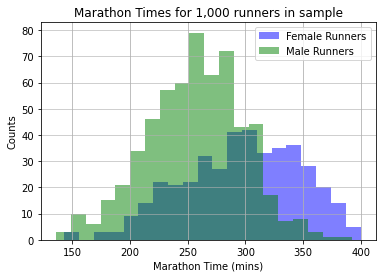

In [64]:
femaleSampleTime = df.loc[df["Gender"] == "F", "Time"]
maleSampleTime = df.loc[df["Gender"] == "M", "Time"]

femaleSampleTime.plot.hist(grid=True, bins=20, rwidth=10, color='blue', label="Female Runners", alpha=0.5)
maleSampleTime.plot.hist(grid=True, bins=20, rwidth=10, color='green', label="Male Runners", alpha=0.5)

plt.title('Marathon Times for 1,000 runners in sample')
plt.ylabel('Counts')
plt.xlabel('Marathon Time (mins)')
plt.legend(loc="best")
plt.grid(axis='y', alpha=0.75)

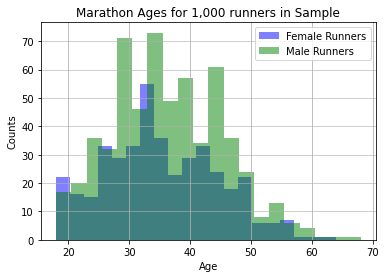

In [65]:
femaleSampleAge = df.loc[df["Gender"] == "F", "Age"]
maleSampleAge = df.loc[df["Gender"] == "M", "Age"]

femaleSampleAge.plot.hist(grid=True, bins=20, rwidth=10, color='blue', label="Female Runners", alpha=0.5)

maleSampleAge.plot.hist(grid=True, bins=20, rwidth=10, color='green', label="Male Runners", alpha=0.5)

plt.title('Marathon Ages for 1,000 runners in Sample')
plt.ylabel('Counts')
plt.xlabel('Age')
plt.legend(loc="best")
plt.grid(axis='y', alpha=0.75)

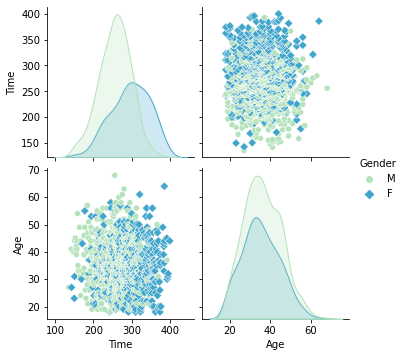

In [75]:
# Pairplot with gender hue
sns.pairplot(df, hue="Gender", palette="GnBu",  markers=["o", "D"])

# 8. Conclusions <a name="8.s"></a>

-------------------

## Discussion on data <a name="discussion"></a>

The plots produced from the simulated data set are identicle to the existing data researched from the boston marathon. They provide a good baseline simulation of a potential event similar in Galway.

## Possible uses for data <a name="uses"></a>

This data set is a good example of a dataset that is practical in its uses, They include:

* Predicting results based on the variables
* Predicting number of applicants to a race and specific attributes of them. 
* could be used to estimate number of finishing medals and shirts to order that are male female specific. 
* Could predict a reasonable expected finishers time based on loacl entries, not including outliers.
* Could allow race organisers understand how long a race will be on, and when to expect most people to cross the finish line. 


## Sources of error <a name="error"></a>

Some possible sources of error include:

* Male female stats localily specified: Race is taking place in galway. No info was found on galway specificly.
* Distribution errors: Possibly more in dept data distribution needed for data. Marathon running may not be simply moddled as normally distributed. 
* Age / time relationship: currently just randomly applied to df in order of age. furter study needed. 


## Reccommended further study <a name="reccomendedstudy"></a>

Further research is reccomended in teh following areas to improve the simulated dataset:

* Age / time relationship: Study the effect age has on marathon times. 
* Split up the data more: simulate data using multiple sample and combine for a population. 
* Investigate marathon outliers and the effect they have on running an event. eg. very slow runners vs shut off time. 
* Difference between local galway race and international race of similar size. 



# 9. References <a name="references"></a>

----------------------------

[1] Boston Marathon; Wikipedia; https://en.wikipedia.org/wiki/Boston_Marathon

[2] Boston-Marathon-Data-Project; Adrian Hanft; github;  https://github.com/adrian3/Boston-Marathon-Data-Project

[3] Marathon; Wikipedia; https://en.wikipedia.org/wiki/Marathon

[4] Qualify for the Boston marathon; baa.org;  https://www.baa.org/races/boston-marathon/qualify

[5] markdown-to-create-pages-and-table-of-contents; stack overflow;  https://stackoverflow.com/questions/11948245/markdown-to-create-pages-and-table-of-contents/33433098#33433098

[6] Input/output; the pandas development team; https://pandas.pydata.org/pandas-docs/stable/reference/io.html

[7] pandas.DataFrame.sample; the pandas development team; https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html

[8] pandas.to_timedelta; the pandas development team;(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_timedelta.html)

[9] pandas.DataFrame.dtypes; the pandas development team; https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html

[10] convert-timedelta64ns-column-to-seconds-in-python-pandas-dataframe; stackoverflow; https://stackoverflow.com/questions/26456825/convert-timedelta64ns-column-to-seconds-in-python-pandas-dataframe

[11] pandas.Timedelta.total_seconds; the pandas development team; https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timedelta.total_seconds.html 

[12] datetimelike-properties; the pandas development team; https://pandas.pydata.org/docs/reference/series.html#datetimelike-properties

[13] pandas.DataFrame.describe; the pandas development team; https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

[14] research-marathon-performance-across-nations; runrepeat.com; https://runrepeat.com/research-marathon-performance-across-nations

[15] new-study-reports-more-female-than-male-runners-for-the-first-time-ever;  Gripped Publishing Inc.; https://runningmagazine.ca/the-scene/new-study-reports-more-female-than-male-runners-for-the-first-time-ever/

[16] what-is-a-good-time-for-a-marathon; ASICS Europe; https://www.asics.com/ie/en-ie/running-advice/what-is-a-good-time-for-a-marathon/

[17] how-the-boston-marathon-messes-with-runners-to-slow-them-down;  Condé Nast; https://www.wired.com/story/how-the-boston-marathon-messes-with-runners-to-slow-them-down/

[18] boston-marathon-data-analysis-part-1; medium; https://ade3.medium.com/boston-marathon-data-analysis-part-1-4891d1832eba

[19] Distribution of Marathon Finishing Times; ResearchGate GmbH;https://www.researchgate.net/profile/George_Wu3/publication/301571201/figure/fig2/AS:601871815299079@1520508831816/Distribution-of-Marathon-Finishing-Times-n-9-789-093.png

[20] scipy.stats.truncnorm; The SciPy community;  https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.truncnorm.html

[21] how-to-get-a-normal-distribution-within-a-range-in-numpy; Stack Exchange Inc; https://stackoverflow.com/questions/36894191/how-to-get-a-normal-distribution-within-a-range-in-numpy

[22] Truncated_normal_distribution; Wikipedia; https://en.wikipedia.org/wiki/Truncated_normal_distribution

[23] research-marathon-performance-across-nations; RunRepeat.com; https://runrepeat.com/research-marathon-performance-across-nations

[24] a-data-analysis-of-the-dublin-marathon-48138724973e; Medium.com; https://medium.com/running-with-data/a-data-analysis-of-the-dublin-marathon-48138724973e

[25] What is the average marathon finish time?; Runner's World; https://www.runnersworld.com/uk/training/marathon/a27787958/average-marathon-finish-time/

[26] These are the worlds fastest marathoners and marathon courses; Runner's World; https://www.runnersworld.com/races-places/a20823734/these-are-the-worlds-fastest-marathoners-and-marathon-courses/

[27] Gender Ratio; Hannah Ritchie and Max Roser; https://ourworldindata.org/gender-ratio

[28] Kathrine Switzer; wikipedia; https://en.wikipedia.org/wiki/Kathrine_Switzer

[29] Analysing Dublin Marathon Data (1980-2016); Shane Galvin; http://www.shanegalvin.com/analysing-dublin-marathon-data-1980-2016/

[30] List of countries by median age; Wikipedia; https://en.wikipedia.org/wiki/List_of_countries_by_median_age

[31] Average Marathon Times: Broken Down By Age, Gender, And Course;  Thomas Watson; https://marathonhandbook.com/average-marathon-time/#:~:text=The%20average%20age%20of%20a%20male%20marathon%20runner%20is%2040%20years%20old.

[32] numpy.full; The SciPy community; https://numpy.org/doc/stable/reference/generated/numpy.full.html

[33] pandas.DataFrame; the pandas development team; https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

[34] merging; the pandas development team; https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

[35] half marathon finish time prediction; medium.com; https://towardsdatascience.com/half-marathon-finish-time-prediction-part-1-5807760033eb

[36] pandas.DataFrame.sort_values; the pandas development team; https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

[37] pandas.DataFrame.apply; the pandas development team; https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html

[38] pandas.DataFrame.rename_axis; the pandas development team; https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename_axis.html